# Chapter 4 - Classification

In [48]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-whitegrid')

** Load Data **

In [49]:
df = pd.read_excel('../Data/Default.xlsx')

**Categories**

Make `default` and `student` columns `Categorical`

In [50]:
df['default'] = df['default'].astype('category')
df['student'] = df['student'].astype('category')

In [51]:
df[['default', 'student']].apply(Series.value_counts)

,default,student
No,9667,7056
Yes,333,2944


## Figure 4.1

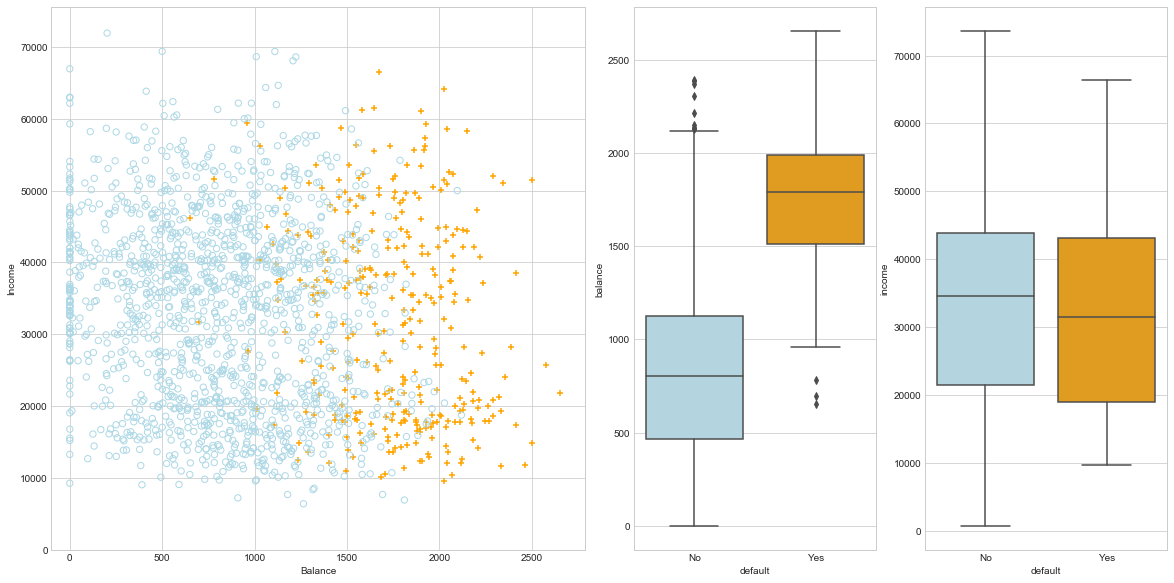

In [52]:
fig = plt.figure(figsize=(20,10))
gs = mpl.gridspec.GridSpec(1,4)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, -2])
ax3 = plt.subplot(gs[0,-1])

# Since there are too many data in No than Yes, Sample some datas
# from No to make scatter plot.
df_no = df[df.default == 'No'].sample(frac=0.15)

ax1.scatter(df[df.default == 'Yes'].balance, df[df.default == 'Yes'].income,
           s=40, c='orange', marker='+', linewidths=1)
ax1.scatter(df_no.balance, df_no.income,
           s=40, edgecolors='lightblue', facecolors='none',
            marker='o', linewidths=1)
ax1.set_ylim(ymin = 0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2,
           palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3,
           palette=c_palette)

## Figure 4.2

In [53]:
X_train = df.balance.values.reshape(-1,1)
y = df.default

In [54]:
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

In [55]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train, y)
prob = clf.predict_proba(X_test)

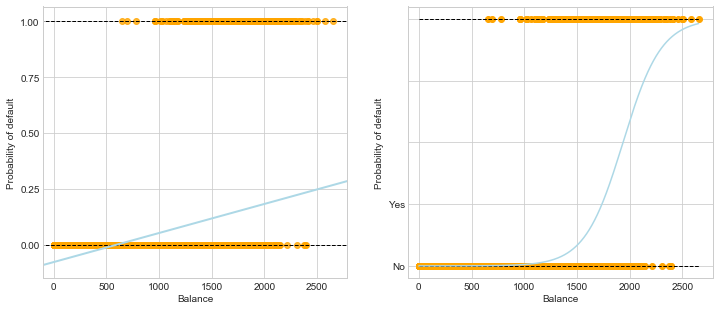

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(df.balance, df.default.cat.codes, order=1, ci=None,
           scatter_kws={'color':'orange'},
           line_kws={'color':'lightblue', 'lw':2}, ax=ax1)

# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='--',
             lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed',
             lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0,0.25,0.5,0.75,1.])
    ax.set_xlim(xmin=-100)
    

## Table 4.1

In [57]:
y = df.default

### scikit-learn

In [58]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df.balance.values.reshape(-1,1)
clf.fit(X_train, y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
classes:  ['No' 'Yes']
coefficients:  [[ 0.00549891]]
intercept : [-10.65131936]


### statsmodels
There is an error to use deprecated Scipy function `scipy.stats.chisqprob` in `statsmodels` module. So we need an workaround to avoid this issue.

In [59]:
from scipy import stats
# Workaround
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [60]:
X_train = sm.add_constant(df.balance)
est = smf.Logit(y.cat.codes, X_train).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Jan 2018   Pseudo R-squ.:                  0.4534
Time:                        10:15:36   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Table 4.2

In [61]:
df['student2'] = df['student'].cat.codes

In [62]:
X_train = sm.add_constant(df.student2)
y = df.default

est = smf.Logit(y.cat.codes, X_train).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Jan 2018   Pseudo R-squ.:                0.004097
Time:                        10:15:36   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                 0.0005416
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.115      3.520      0.000       0.179       0.630
==============================================================================
"""

## Table 4.3 - Multiple Logistic Regression

In [63]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = smf.Logit(y.cat.codes, X_train).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 Jan 2018   Pseudo R-squ.:                  0.4619
Time:                        10:15:36   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2      -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Figure 4.3 - Confounding

In [64]:
# Balance and default vectors for students
X_train = df[df.student == 'Yes'].balance.values.reshape(-1,1)
y = df[df.student == 'Yes'].default.cat.codes

In [65]:
# Balance and default vectors for non-students
X_train2 = df[df.student == 'No'].balance.values.reshape(-1,1)
y2 = df[df.student == 'No'].default.cat.codes

In [66]:
# Create a range for plotting
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

In [67]:
clf = skl_lm.LogisticRegression(solver='lbfgs')
clf2 = skl_lm.LogisticRegression(solver='lbfgs')

In [68]:
clf.fit(X_train, y)
clf2.fit(X_train2,y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [69]:
df.groupby(['student', 'default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


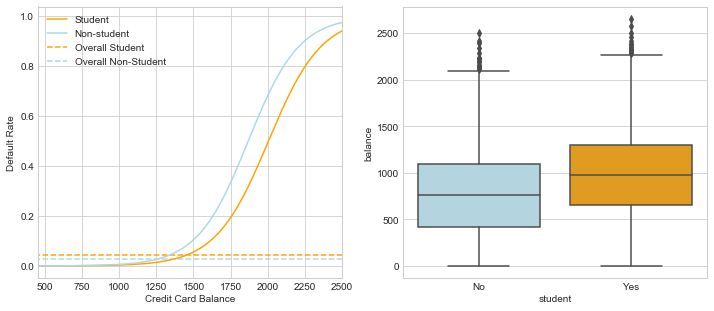

In [70]:
# Create Plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(X_test, DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-student')
ax1.hlines(127/(2817+127), colors='orange', label='Overall Student',
          xmin=ax1.xaxis.get_data_interval()[0],
          xmax=ax1.xaxis.get_data_interval()[1],
          linestyles='dashed')
ax1.hlines(206/(6850+206), colors='lightblue', label='Overall Non-Student',
          xmin=ax1.xaxis.get_data_interval()[0],
          xmax=ax1.xaxis.get_data_interval()[1],
          linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450, 2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2,
           palette=c_palette)

## Linear Discriminant Analysis
## Table 4.4

In [71]:
df['student2'] = df['student'].cat.codes
df['default2'] = df['default'].cat.codes
X = df[['balance', 'income', 'student2']].as_matrix()
y = df.default2.as_matrix()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X,y).predict(X)
y_prob = lda.fit(X,y).predict_proba(X)

df_ = pd.DataFrame({'True': y,
                   'Predicted': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

In [72]:
pd.crosstab(df_['Predicted'],df_['True'], margins=True)

True,No,Yes,All
Predicted,,,
No,9645,254,9899
Yes,22,79,101
All,9667,333,10000


## Table 4.5

In [73]:
decision_prob = 0.2

df_ = pd.DataFrame({'True': y, 'Predicted': y_prob[:,1] > 
                   decision_prob})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

In [74]:
pd.crosstab(df_['Predicted'],df_['True'], margins=True)

True,No,Yes,All
Predicted,,,
No,9435,140,9575
Yes,232,193,425
All,9667,333,10000


## Figure 4.7, 4.8 - ROC curve for LDA

In [75]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y,y_prob[:,1],pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

## Figure 4-7
I couldn't find a way to calculate error rate with a proper module, so i calculated by myself. If anyone knows a better way, please let me know.

In [76]:
# Original Method(Rough way)
df = DataFrame({'fpr':fpr, 'tpr':tpr, 'thres':thresholds})
df['FN'] = (1-df['tpr']) * 333
df['FP'] = (df['fpr']*9667)
df['error_rate'] = (df['FP'] + df['FN'])/10000

# default error:
# the fraction of defaulting customers that are incorrectly classfied.
df['default_error'] = (1 - df['tpr'])

# non_default error:
# the fraction of errors among the non-defaulting customers
# == false positive rates.

Text(0,0.5,'Error Rate')

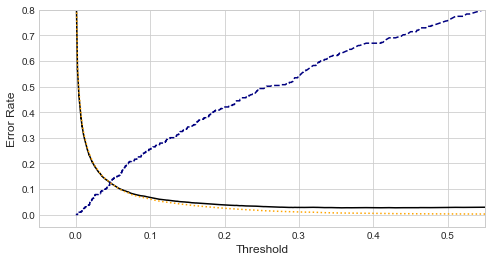

In [77]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
# overall error rate
plt.plot(df['thres'],df['error_rate'], c='k')
# default error rate
plt.plot(df['thres'],df['default_error'], c='navy',
        linestyle='--')
# non_default error rate
plt.plot(df['thres'],df['fpr'], c='orange',
        linestyle=':')

ax.set_ylim([-0.05,0.8])
ax.set_xlim([-0.05, 0.55])
ax.set_xlabel("Threshold", fontsize=12)
ax.set_ylabel("Error Rate", fontsize=12)

## Figure 4-8

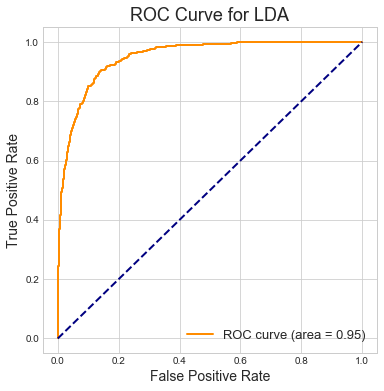

In [78]:
fig, ax =plt.subplots(1,1,figsize=(6,6))
plt.plot(fpr, tpr, color="darkorange", 
         label='ROC curve (area = %0.2f)' % roc_auc, lw=2)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='dashed')
ax.set_title("ROC Curve for LDA", fontsize=18)
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
ax.legend(loc="lower right", fontsize=13)

## Figure 4-9
Left : two Gaussian classes have a common correlation of 0.7 between $X_{1}$ and $X_{2}$.

Right : the orange class has a correlation of 0.7 between the variables and the blue class has a correlation of -0.7

In [32]:
from scipy.stats import multivariate_normal
np.random.seed(1)
# Create Frozen objects for future use in Bayes Decision.
rv1_L = multivariate_normal([-1,-1], [[1,0.7],[0.7,1]])
rv2_L = multivariate_normal([1,1], [[1,0.7],[0.7,1]])
rv1_R = multivariate_normal([-1,-1], [[1,0.7],[0.7,1]])
rv2_R = multivariate_normal([1,1], [[1,-0.7],[-0.7,1]])

lnorm1 = rv1_L.rvs(50)
lnorm2 = rv2_L.rvs(50)
rnorm1 = rv1_R.rvs(50)
rnorm2 = rv2_R.rvs(50)

In [33]:
df_lclass0 = DataFrame({'Y': 0, 'X1':lnorm1[:,0], 'X2':lnorm1[:,1]})
df_lclass1 = DataFrame({'Y': 1, 'X1':lnorm2[:,0], 'X2':lnorm2[:,1]})
df_L = df_lclass0.append(df_lclass1)

df_rclass0 = DataFrame({'Y': 0, 'X1':rnorm1[:,0], 'X2':rnorm1[:,1]})
df_rclass1 = DataFrame({'Y': 1, 'X1':rnorm2[:,0], 'X2':rnorm2[:,1]})
df_R = df_rclass0.append(df_rclass1)

These are what i will use for Figure 4-9
- LinearDiscriminantAnalysis
- QuadraticDiscriminantAnalysis
- Bayes Decision Boundary

** LDA and QDA **

In [34]:
# Left
lda_L = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda_L = QuadraticDiscriminantAnalysis(store_covariance=True)
X = df_L[['X1','X2']]
y = df_L['Y']
lda_L.fit(X,y)
qda_L.fit(X,y)

# Right
lda_R = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda_R = QuadraticDiscriminantAnalysis(store_covariance=True)
X = df_R[['X1','X2']]
y = df_R['Y']
lda_R.fit(X,y)
qda_R.fit(X,y)

lda = [lda_L, lda_R]
qda = [qda_L, qda_R]

**Bayes Decision Boundary**

In [35]:
def bayes_get_proba(data, rv1, rv2):
    return rv2.pdf([data[0],data[1]]) / (rv1.pdf([data[0],data[1]]) + rv2.pdf([data[0],data[1]]))
rv = [[rv1_L,rv2_L],
      [rv1_R,rv2_R]]

**Plot**

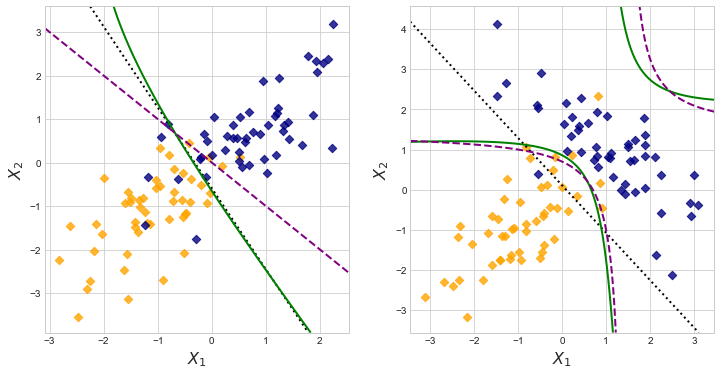

In [36]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

# Left Scatter Plot
sns.regplot(df_lclass0['X1'],df_lclass0['X2'],ax=axes[0], 
            fit_reg=False, color='orange', marker='D')
sns.regplot(df_lclass1['X1'],df_lclass1['X2'],ax=axes[0], 
            fit_reg=False, color='navy', marker='D')

# Right Scatter Plot
sns.regplot(df_rclass0['X1'],df_rclass0['X2'],ax=axes[1], 
            fit_reg=False, color='orange', marker='D')
sns.regplot(df_rclass1['X1'],df_rclass1['X2'],ax=axes[1], 
            fit_reg=False, color='navy', marker='D')

nx, ny = 200, 200

for i in range(2):
    x_min, x_max = axes[i].get_xlim()
    y_min, y_max = axes[i].get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    
    # Decision Boundaries
    # LDA
    Z = lda[i].predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    axes[i].contour(xx, yy, Z, [0.5], linewidths=2., colors='k',
                   linestyles='dotted')
    # QDA
    Z = qda[i].predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    axes[i].contour(xx, yy, Z, [0.5], linewidths=2., colors='green',
                   linestyles='solid')
    
    # Bayes Decision Boundary
    Z = (DataFrame({'x':xx.ravel(),'y':yy.ravel()})
        .apply(bayes_get_proba, args=(rv[i][0],rv[i][1]), axis=1)
        .values.reshape(xx.shape))
    
    axes[i].contour(xx, yy, Z, [0.5], linewidths=2., colors='purple',
                   linestyles='dashed')
    
for i in range(2):
    axes[i].set_xlabel('$X_{1}$', fontsize=16)
    axes[i].set_ylabel('$X_{2}$', fontsize=16)

## Issue with Figure 4-9
I think there is a problem with Bayes Decision Boundary in left plot. So be careful to write this code. I don't know why this happened, but i will come back later to this issue.

## 4.6 Lab: Logistic Regression, LDA, QDA, and KNN
### 4.6.1 The Stock Market Data

In [37]:
df = pd.read_csv('../Data/Smarket.csv', index_col=0, parse_dates=True)

In [38]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [39]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [40]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


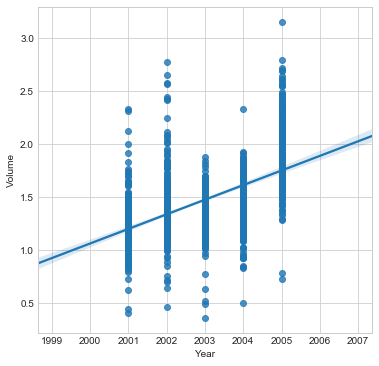

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
sns.regplot(df['Year'],df['Volume'], ax=ax)

### 4.6.2 Logistic Regression

In [42]:
df['Direction2'] = np.where(df['Direction'] == 'Up',1,0)

In [43]:
est = smf.logit('Direction2 ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', df).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Direction2   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Jan 2018   Pseudo R-squ.:                0.002074
Time:                        12:00:41   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

To access just the coefficients for this fitted model, use **est.params**

In [44]:
est.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

To get estimated probabilities, use **est.predict**

In [45]:
prob = est.predict(df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
prob.head()

1    0.507084
2    0.481468
3    0.481139
4    0.515222
5    0.510781
dtype: float64

We can use predicted probabilities to get a confusion matrix

In [46]:
pred_direction = np.where(prob>0.5,"Up","Down")

In [47]:
pd.crosstab(Pred_Direction, df['Direction'])

NameError: name 'Pred_Direction' is not defined

### Estimation with Train/Test Set
Now, create a Boolean list to subset train set in logit function

In [ ]:
train = df['Year'] < 2005
df_test = df[~train]

In [ ]:
est = smf.logit('Direction2 ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', df,
               subset=train).fit()
est.summary()

In [ ]:
prob = est.predict(df_test[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
pred_direction = np.where(prob>0.5,"Up","Down")

In [ ]:
pd.crosstab(pred_direction, df_test['Direction'])

### Estimation with Lag1, Lag2

In [ ]:
est = smf.logit('Direction2 ~ Lag1 + Lag2', data=df, subset=train).fit()
est.summary()

In [ ]:
prob = est.predict(df_test[['Lag1','Lag2']])
pred_direction = np.where(prob>0.5,"Up","Down")
pd.crosstab(pred_direction,df_test['Direction'])

In [ ]:
# To predict with a particular lag1, lag2 value,
est.predict(DataFrame({'Lag1':[1.2,1.5],'Lag2':[1.1,-0.8]}))

### LDA and QDA
Since LDA and QDA are quite similar to above methods and i have already done many times, Do it yourself.

### 4.6.5 K-Nearest Neighbors

In [ ]:
train_X = df[train][['Lag1','Lag2']]
test_X = df[~train][['Lag1','Lag2']]
train_y = df[train]['Direction']
test_y = df[~train]['Direction']

In [ ]:
# n = 1
np.random.seed(1)
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(train_X, train_y).predict(test_X)

pd.crosstab(pred, test_y)

In [ ]:
# n = 3
np.random.seed(1)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(train_X, train_y).predict(test_X)

pd.crosstab(pred, test_y)

### 4.6.6 An Application to Caravan Insurance Data

In [ ]:
df = pd.read_csv('../Data/Caravan.csv', usecols=range(1,87))
df.shape

In [ ]:
df['Purchase'].value_counts()

In [ ]:
standardized_X = DataFrame(preprocessing.scale(df.drop('Purchase', axis=1)),
                          columns=df.columns[:-1])

In [ ]:
np.var(df.iloc[:,0])

In [ ]:
np.var(df.iloc[:,1])

In [ ]:
np.var(standardized_X.iloc[:,0])

In [ ]:
np.var(standardized_X.iloc[:,1])

In [ ]:
train_X = standardized_X.iloc[1000:,:]
test_X = standardized_X.iloc[:1000,:]
train_y = df['Purchase'][1000:]
test_y = df['Purchase'][:1000]

In [ ]:
np.random.seed(1)
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(train_X, train_y).predict(test_X)

pd.crosstab(pred, test_y)

In [ ]:
# KNN Error
(test_y == pred).value_counts()

In [ ]:
# The fraction of individuals that are correctly predicted to buy insurance
9/(68+9)

In [ ]:
# Simple Classifier "NO" Error
(test_y == "No").value_counts()

In [ ]:
# n = 3
np.random.seed(1)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(train_X, train_y).predict(test_X)

pd.crosstab(pred, test_y)

In [ ]:
# n = 5
np.random.seed(1)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
pred = knn.fit(train_X, train_y).predict(test_X)

pd.crosstab(pred, test_y)

### Logistic Regression

In [ ]:
# cut-off : 0.5
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(train_X, train_y)
prob = clf.predict_proba(test_X)[:,1]
pred_purchase = np.where(prob>0.5,"Yes","No")
pd.crosstab(pred_purchase, test_y)

In [ ]:
# cut-off : 0.25
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(train_X, train_y)
prob = clf.predict_proba(test_X)[:,1]
pred_purchase = np.where(prob>0.25,"Yes","No")
pd.crosstab(pred_purchase, test_y)